In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from diffusion.noise_scheduler import NoiseScheduler

In [2]:
DATA_PATH = Path("../data")

In [3]:
crop_size = (178, 178)
size = (32, 32)

test_data = datasets.CelebA(
    root=DATA_PATH,
    split="test",
    transform=transforms.Compose([
        transforms.CenterCrop(crop_size),
        transforms.Resize(size),
        transforms.ToTensor()
    ]),
    download=True
)
test_dataloader = DataLoader(test_data, batch_size=5, shuffle=True)
test_data[0][0].shape

Files already downloaded and verified


torch.Size([3, 32, 32])

In [4]:
noise_scheduler = NoiseScheduler(0, 0.01, 10)

torch.Size([5, 3, 32, 32])


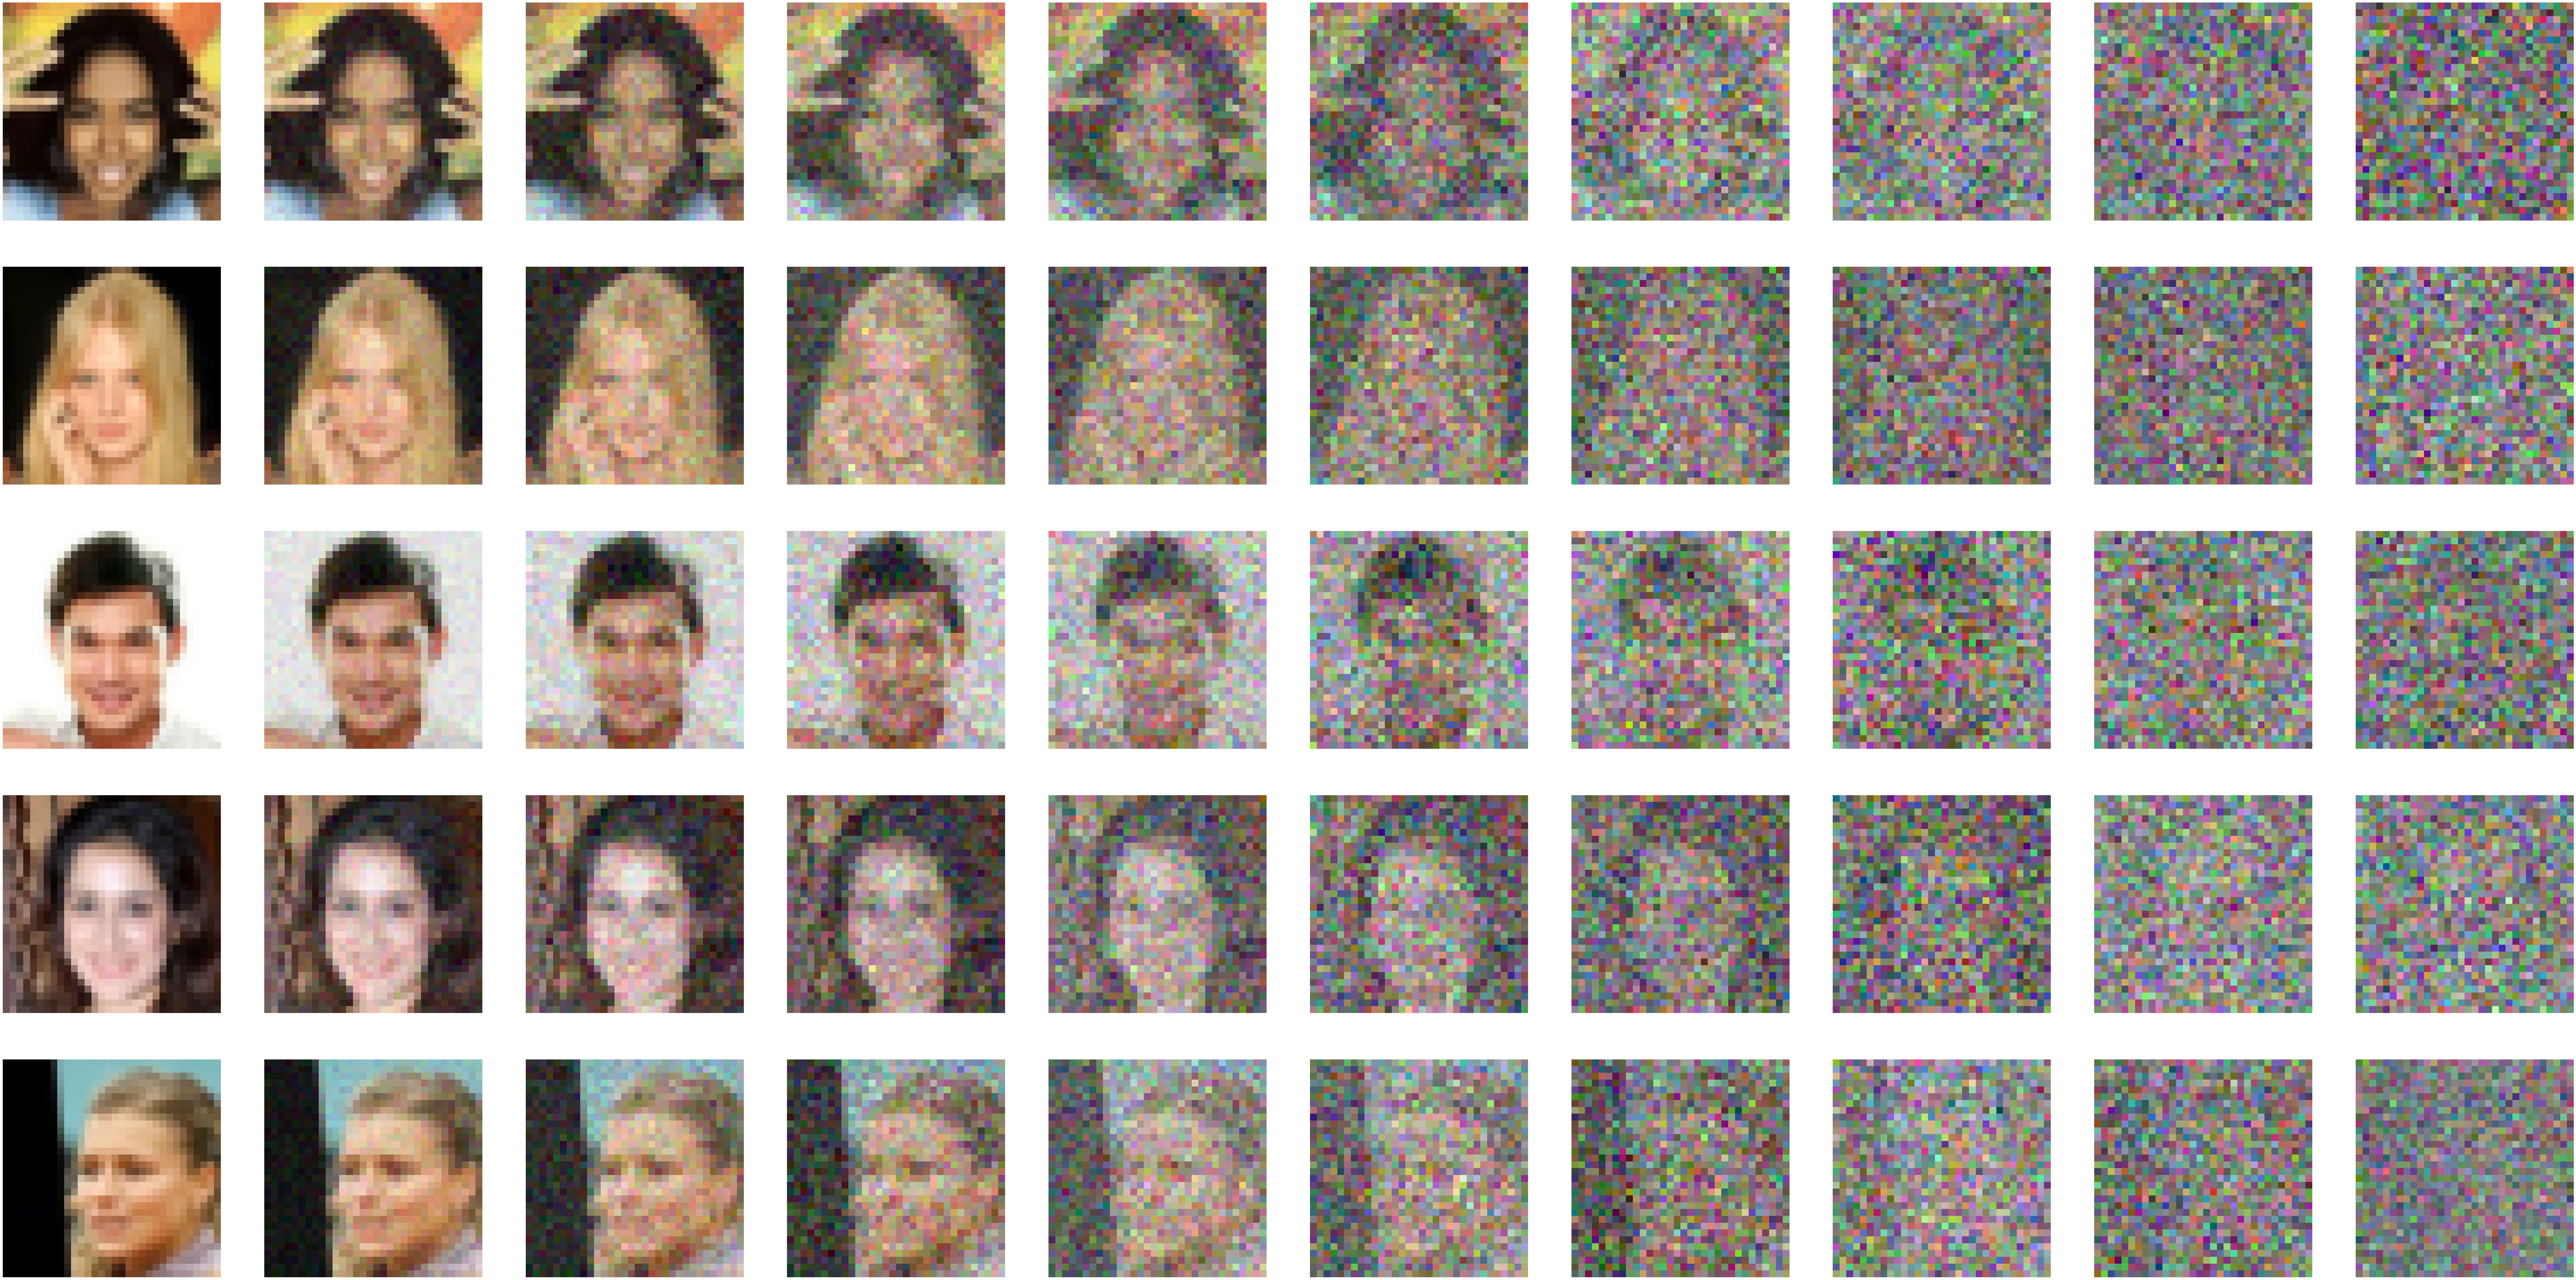

In [5]:
fig = plt.figure(figsize=(120,60))
steps = 10
for xs, _ in test_dataloader:
    for step in range(steps):
        ts = torch.tensor(step).reshape(1)
        xs, _ = noise_scheduler.forward_process(xs, ts)
        for i in range(xs.shape[0]):
            xs[i, :, :, :] -= torch.min(xs[i, :, :, :])
            xs[i, :, :, :] /= torch.max(xs[i, :, :, :])
            plt.subplot(xs.shape[0], steps, steps*i+step+1)
            plt.imshow(xs[i, :, :, :].permute(1, 2, 0))
            plt.axis('off')

    print(xs.shape)
    break